In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Ridge regression

Make the train and test sets

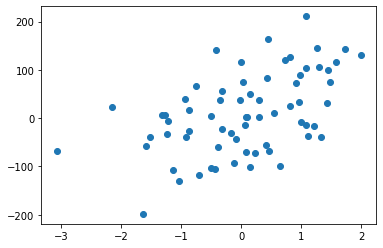

In [2]:
X, y = datasets.make_regression(n_features=4, noise=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
plt.scatter(X_train[:,0], y_train)
plt.show()

Train the model and do predictions

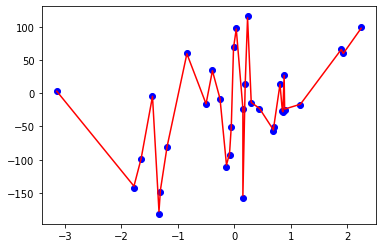

In [3]:
from ridge_regressor import RidgeRegressor
    
ridge_regressor = RidgeRegressor()
ridge_regressor.fit(X_train, y_train)
y_pred = ridge_regressor.predict(X_test)
sorted_indices = np.argsort(X_test[:,0])

plt.plot(X_test[:,0][sorted_indices], y_pred[sorted_indices], color='r')
plt.scatter(X_test[:,0][sorted_indices], y_test[sorted_indices], color='b')
plt.show()

# Gaussian process

Make the train and test sets

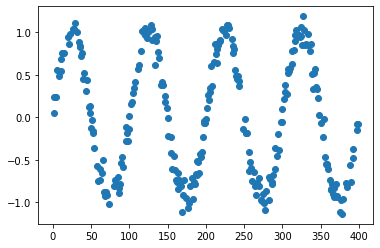

In [4]:
time_step = 400
X = np.arange(time_step).reshape(-1,1)
y = np.sin(2*np.pi*X[:,0]*0.01) + np.random.normal(size=time_step, scale=0.1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.scatter(X_train[:,0], y_train)
plt.show()

Train the model and do predictions

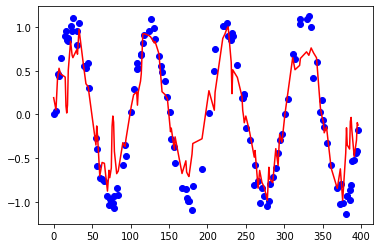

In [5]:
from gaussian_regressor import GaussianRegressor

gaussian_regressor = GaussianRegressor()
gaussian_regressor.fit(X_train, y_train)
y_pred = gaussian_regressor.predict(X_test)
sorted_indices = np.argsort(X_test[:,0])

plt.plot(X_test[:,0][sorted_indices], y_pred[sorted_indices], color='r')
plt.scatter(X_test[:,0][sorted_indices], y_test[sorted_indices], color='b')
plt.show()

# SVM

Make the train and test sets

In [8]:
dataset = datasets.load_wine()
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Preprocessing for SVM
y_train = 2*y_train - 1
y_test  = 2*y_test  - 1

Train and test the model

In [9]:
from svm import SVM

classifier = SVM()
classifier.fit(X_train, y_train)
print('Accuracy:', classifier.eval(X_test, y_test))

Accuracy: 0.7457627118644068


/usr/local/lib/python3.7/dist-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)


# Decision tree

Make the train and test sets

In [10]:
dataset = datasets.load_diabetes()
X = dataset.data[:,:3]
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Train and test the model

In [11]:
from decision_tree import DecisionTree

classifier = DecisionTree()
classifier.fit(X_train, y_train)
print('Accuracy:', classifier.eval(X_test, y_test))

Accuracy: 0.00684931506849315


# Naive Bayes

Make the train and test sets. The features are the counts of the words in a document.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups(categories=['comp.graphics', 'sci.med'])
X = CountVectorizer().fit_transform(data.data)[:,1000]
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=43)

Train and test the model

In [13]:
from naive_bayes import NaiveBayes

classifier = NaiveBayes()
classifier.fit(X_train, y_train)
print('Accuracy:', classifier.eval(X_test, y_test))

Accuracy: 0.5089974293059126


# Gaussian Bayes

Make the train and test sets

In [58]:
dataset = datasets.load_wine()
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Train and test the model

In [59]:
from gaussian_bayes import GaussianBayes

classifier = GaussianBayes()
classifier.fit(X_train, y_train)
print('Accuracy:', classifier.eval(X_test, y_test))

Accuracy: 0.9830508474576272


# K-mean

Make the blobs

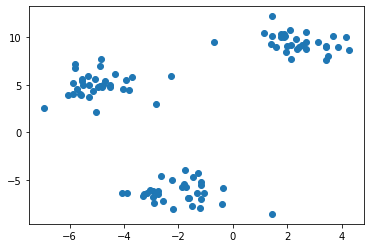

In [62]:
X, y = datasets.make_blobs()

plt.scatter(X[:,0], X[:,1])
plt.show()

Run k-mean

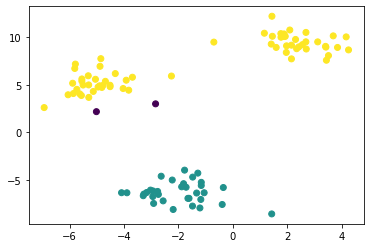

In [63]:
from k_mean import KMEAN

k_mean = KMEAN()
k_mean.fit(X, cluster_num=3)
membership = k_mean.get_membership()

plt.scatter(X[:,0], X[:,1], c=list(membership))
plt.show()

# Gaussian mixture model

Make the blobs

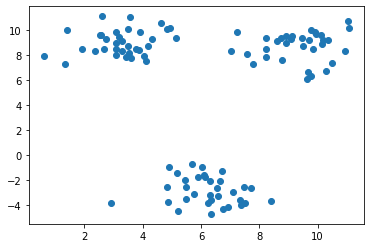

In [64]:
X, y = datasets.make_blobs()

plt.scatter(X[:,0], X[:,1])
plt.show()

Run GMM

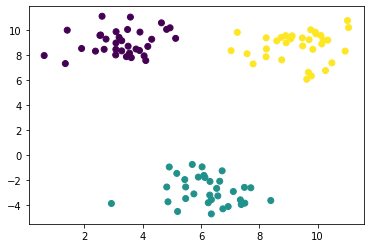

In [65]:
from gmm import GMM
        
gmm = GMM()
gmm.fit(X, cluster_num=3)
membership = gmm.get_membership()

plt.scatter(X[:,0], X[:,1], c=list(membership))
plt.show()

#Neural Network for dataset load_diabetes

In [54]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
dataset = datasets.load_diabetes()
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

train_result = accuracy_score(predict_train, y_train)
print("training output:", train_result)
test_result = accuracy_score(predict_test, y_test)
print("test output:", test_result)

training output: 0.05067567567567568
test output: 0.00684931506849315


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [55]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

        25.0       0.00      0.00      0.00         1
        31.0       0.00      0.00      0.00         1
        39.0       0.00      0.00      0.00         2
        40.0       0.00      0.00      0.00         1
        42.0       0.00      0.00      0.00         2
        43.0       0.00      0.00      0.00         1
        44.0       0.00      0.00      0.00         1
        45.0       0.00      0.00      0.00         1
        47.0       0.00      0.00      0.00         2
        48.0       0.00      0.00      0.00         1
        49.0       0.00      0.00      0.00         3
        50.0       0.00      0.00      0.00         1
        51.0       0.00      0.00      0.00         2
        52.0       0.00      0.00      0.00         1
        53.0       0.00      0.00      0.00         3
        54.0   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Task 1: Execute the code properly and solve any issues that may arise in the code (10%)

# Task 2: Understand and explain what did you analyze in the code. Make a detailed analysis (30%)

# Task 3: Use any other dataset to run the tasks above again (40%)

# Task 4: Use basic Artificial Neural Network on the dataset used in Task#3 (20%)